<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#5.1　交叉验证" data-toc-modified-id="5.1　交叉验证-1">5.1　交叉验证</a></span><ul class="toc-item"><li><span><a href="#5.1.1　scikit-learn中的交叉验证" data-toc-modified-id="5.1.1　scikit-learn中的交叉验证-1.1">5.1.1　scikit-learn中的交叉验证</a></span></li><li><span><a href="#5.1.2　交叉验证的优点" data-toc-modified-id="5.1.2　交叉验证的优点-1.2">5.1.2　交叉验证的优点</a></span></li><li><span><a href="#5.1.3　分层k折交叉验证和其他策略" data-toc-modified-id="5.1.3　分层k折交叉验证和其他策略-1.3">5.1.3　分层k折交叉验证和其他策略</a></span><ul class="toc-item"><li><span><a href="#1.-对交叉验证的更多控制" data-toc-modified-id="1.-对交叉验证的更多控制-1.3.1">1. 对交叉验证的更多控制</a></span></li><li><span><a href="#2.-留一法交叉验证" data-toc-modified-id="2.-留一法交叉验证-1.3.2">2. 留一法交叉验证</a></span></li><li><span><a href="#3.-打乱划分交叉验证" data-toc-modified-id="3.-打乱划分交叉验证-1.3.3">3. 打乱划分交叉验证</a></span></li><li><span><a href="#4.-分组交叉验证" data-toc-modified-id="4.-分组交叉验证-1.3.4">4. 分组交叉验证</a></span></li></ul></li></ul></li><li><span><a href="#5.2　网格搜索" data-toc-modified-id="5.2　网格搜索-2">5.2　网格搜索</a></span><ul class="toc-item"><li><span><a href="#5.2.1　简单网格搜索" data-toc-modified-id="5.2.1　简单网格搜索-2.1">5.2.1　简单网格搜索</a></span></li><li><span><a href="#5.2.2　参数过拟合的风险与验证集" data-toc-modified-id="5.2.2　参数过拟合的风险与验证集-2.2">5.2.2　参数过拟合的风险与验证集</a></span></li><li><span><a href="#5.2.3　带交叉验证的网格搜索" data-toc-modified-id="5.2.3　带交叉验证的网格搜索-2.3">5.2.3　带交叉验证的网格搜索</a></span></li></ul></li></ul></div>

# 第5章 模型评估与改进

In [1]:
from sklearn.datasets import make_blobs 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
 
# 创建一个模拟数据集 
X, y = make_blobs(random_state=0) 
# 将数据和标签划分为训练集和测试集 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
# 将模型实例化，并用它来拟合训练集 
logreg = LogisticRegression().fit(X_train, y_train) 
# 在测试集上评估该模型 
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


## 5.1　交叉验证

交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测
试集的方法更加稳定、全面。在交叉验证中，数据被多次划分，并且需要训练多个模型。
最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，
通常取 5 或 10。在执行 5 折交叉验证时，首先将数据划分为（大致）相等的 5 部分，每一
部分叫作折（fold）。接下来训练一系列模型。使用第 1 折作为测试集、其他折（2-5）作
为训练集来训练第一个模型。利用 2-5 折中的数据来构建模型，然后在 1 折上评估精度。
之后构建另一个模型，这次使用 2 折作为测试集，1、3、4、5 折中的数据作为训练集。利
用 3、4、5 折作为测试集继续重复这一过程。对于将数据划分为训练集和测试集的这 5 次
划分，每一次都要计算精度。最后我们得到了 5 个精度值。整个过程如图 5-1 所示。

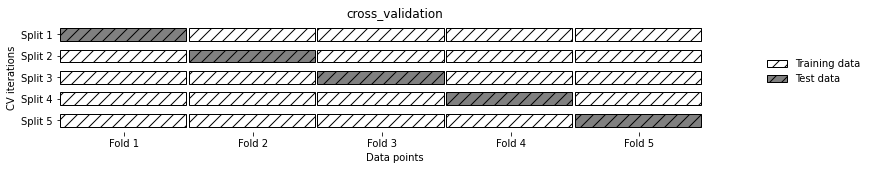

In [3]:
import mglearn
mglearn.plots.plot_cross_validation()

### 5.1.1　scikit-learn中的交叉验证

scikit-learn 是利用 model_selection 模块中的 cross_val_score 函数来实现交叉验证的。
cross_val_score 函数的参数是我们想要评估的模型、训练数据与真实标签。

In [5]:
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_iris 
from sklearn.linear_model import LogisticRegression 
 
iris = load_iris() 
logreg = LogisticRegression(max_iter=10000) 
 
scores = cross_val_score(logreg, iris.data, iris.target) 
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5) 
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [7]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


### 5.1.2　交叉验证的优点

### 5.1.3　分层k折交叉验证和其他策略

 scikit-learn 在分类问题中不使用这种策略，而
是使用分层 k 折交叉验证（stratiﬁed k-fold cross-validation）

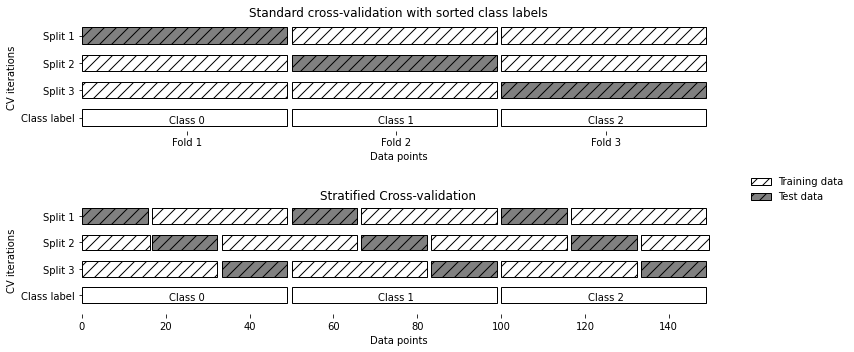

In [8]:
mglearn.plots.plot_stratified_cross_validation()

#### 1. 对交叉验证的更多控制

#### 2. 留一法交叉验证

#### 3. 打乱划分交叉验证

#### 4. 分组交叉验证

## 5.2　网格搜索

### 5.2.1　简单网格搜索

In [9]:
# 简单的网格搜索实现 
from sklearn.svm import SVC 
X_train, X_test, y_train, y_test = train_test_split( 
    iris.data, iris.target, random_state=0) 
print("Size of training set: {}   size of test set: {}".format( 
      X_train.shape[0], X_test.shape[0])) 
 
best_score = 0 
 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        # 对每种参数组合都训练一个SVC 
        svm = SVC(gamma=gamma, C=C) 
        svm.fit(X_train, y_train) 
        # 在测试集上评估SVC 
        score = svm.score(X_test, y_test) 
        # 如果我们得到了更高的分数，则保存该分数和对应的参数 
        if score > best_score: 
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
 
print("Best score: {:.2f}".format(best_score)) 
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 5.2.2　参数过拟合的风险与验证集

看到这个结果，我们可能忍不住要报告，我们找到了一个在数据集上精度达到 97% 的模
型。然而，这种说法可能过于乐观了（或者就是错的），其原因如下：我们尝试了许多不
同的参数，并选择了在测试集上精度最高的那个，但这个精度不一定能推广到新数据上。
由于我们使用测试数据进行调参，所以不能再用它来评估模型的好坏。我们最开始需要将
数据划分为训练集和测试集也是因为这个原因。我们需要一个独立的数据集来进行评估，
一个在创建模型时没有用到的数据集。

为了解决这个问题，一种方法是再次划分数据，这样我们得到 3 个数据集：用于构建模型
的训练集，用于选择模型参数的验证集（开发集），用于评估所选参数性能的测试集。图
5-5 给出了这 3 个集合的图示：

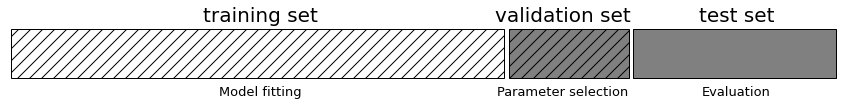

In [11]:
mglearn.plots.plot_threefold_split()

利用验证集选定最佳参数之后，我们可以利用找到的参数设置重新构建一个模型，但是要
同时在训练数据和验证数据上进行训练。这样我们可以利用尽可能多的数据来构建模型。
其实现如下所示：

In [12]:
from sklearn.svm import SVC 
# 将数据划分为训练+验证集与测试集 
X_trainval, X_test, y_trainval, y_test = train_test_split( 
    iris.data, iris.target, random_state=0) 
# 将训练+验证集划分为训练集与验证集 
X_train, X_valid, y_train, y_valid = train_test_split( 
    X_trainval, y_trainval, random_state=1) 
print("Size of training set: {}   size of validation set: {}   size of test set:" 
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 
 
best_score = 0 
 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
        # 对每种参数组合都训练一个SVC 
        svm = SVC(gamma=gamma, C=C) 
        svm.fit(X_train, y_train) 
        # 在验证集上评估SVC 
        score = svm.score(X_valid, y_valid) 
        # 如果我们得到了更高的分数，则保存该分数和对应的参数 
        if score > best_score: 
            best_score = score 
            best_parameters = {'C': C, 'gamma': gamma} 
# 在训练+验证集上重新构建一个模型，并在测试集上进行评估 
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("Best score on validation set: {:.2f}".format(best_score)) 
print("Best parameters: ", best_parameters) 
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 5.2.3　带交叉验证的网格搜索